In [1]:
# Dependencies
# ----------------------------------
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Float
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
Base = declarative_base()

In [2]:
database_path = "Resources/hawaii.sqlite"
engine = create_engine(f"sqlite:///{database_path}")
Base.metadata.create_all(engine)

In [3]:
#vacation dates 6/1/2017 - 6/10/2017
# Reflect Database into ORM classes
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [4]:
Measurement = Base.classes.measurement
Station = Base.classes.station
session = Session(engine)

In [5]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [6]:
columns = inspector.get_columns('measurement')
for c in columns:
        print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [7]:
columns = inspector.get_columns('station')
for c in columns:
        print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [8]:
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [9]:
#esign a query to retrieve the last 12 months of precipitation data. 8/23/2016 - 8/23/2017
prcp_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-22').\
    order_by(Measurement.date).all()

In [10]:
prcp_df = pd.DataFrame(prcp_data)


In [11]:
prcp_df = prcp_df.set_index("date")
prcp_df.sort_index()
prcp_df.head(10)

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15


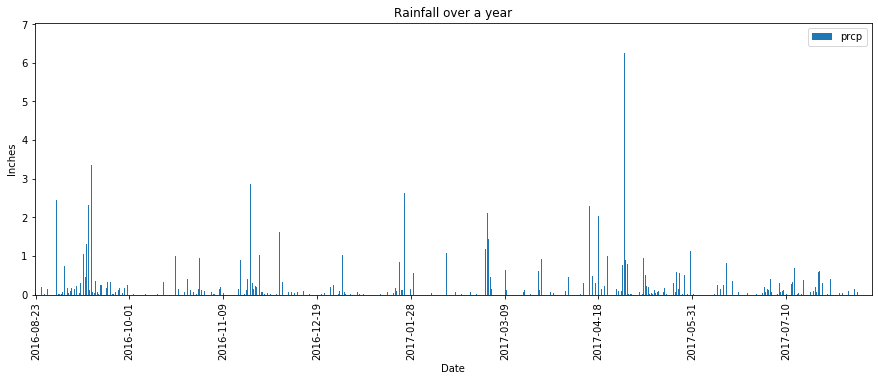

<Figure size 432x288 with 0 Axes>

In [49]:
plot = prcp_df.plot(kind="bar", figsize=(15,5) )
#need to find index number for the date ranges
plt.xticks([4,252,501,753,1003,1253,1501,1752,2001],['2016-08-23', '2016-10-01', '2016-11-09', '2016-12-19', '2017-01-28', '2017-03-09', '2017-04-18', '2017-05-31', '2017-07-10'])
plt.title("Rainfall over a year")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()
plt.tight_layout()

In [13]:
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [14]:
stations_df = pd.DataFrame(session.query(Station.station))
stations_list = stations_df['station'].tolist()
stations_list

['USC00519397',
 'USC00513117',
 'USC00514830',
 'USC00517948',
 'USC00518838',
 'USC00519523',
 'USC00519281',
 'USC00511918',
 'USC00516128']

In [15]:
stations = session.query(Station.station)
station_list = []
station_counts = []
for station in stations:
    station_list.append(station)
    
session.query(Station.station).count()

9

In [16]:
stations_count = []
for station in stations_list:
    stations_count.append(session.query(Measurement).filter(Measurement.station == station).count())
stations_count

[2724, 2709, 2202, 1372, 511, 2669, 2772, 1979, 2612]

In [17]:
#stations_df = pd.DataFrame({
#"station": stations_list,
#"frequency": station_count
#})
stations_df['frequency']=stations_count
stations_df = stations_df.sort_values(by=['frequency'], ascending=False)
stations_df

,station,frequency
6,USC00519281,2772
0,USC00519397,2724
1,USC00513117,2709
5,USC00519523,2669
8,USC00516128,2612
2,USC00514830,2202
7,USC00511918,1979
3,USC00517948,1372
4,USC00518838,511


In [42]:
tobs_data = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date > '2016-08-22').\
    order_by(Measurement.tobs).all()
tobs_data

[('USC00519281', '2017-02-02', 59.0),
 ('USC00519281', '2017-02-08', 59.0),
 ('USC00519281', '2017-02-09', 59.0),
 ('USC00519281', '2017-02-03', 60.0),
 ('USC00519281', '2017-04-30', 60.0),
 ('USC00519281', '2017-02-25', 61.0),
 ('USC00519281', '2016-12-15', 62.0),
 ('USC00519281', '2017-01-06', 62.0),
 ('USC00519281', '2017-01-09', 62.0),
 ('USC00519281', '2017-01-10', 62.0),
 ('USC00519281', '2017-02-10', 62.0),
 ('USC00519281', '2017-03-07', 62.0),
 ('USC00519281', '2016-11-07', 63.0),
 ('USC00519281', '2017-01-04', 63.0),
 ('USC00519281', '2017-01-05', 63.0),
 ('USC00519281', '2017-01-11', 63.0),
 ('USC00519281', '2017-01-03', 64.0),
 ('USC00519281', '2017-02-07', 64.0),
 ('USC00519281', '2017-03-08', 64.0),
 ('USC00519281', '2016-12-13', 65.0),
 ('USC00519281', '2017-01-12', 65.0),
 ('USC00519281', '2017-01-28', 65.0),
 ('USC00519281', '2017-02-16', 65.0),
 ('USC00519281', '2017-02-27', 65.0),
 ('USC00519281', '2017-03-18', 65.0),
 ('USC00519281', '2017-05-01', 65.0),
 ('USC005192

In [44]:
tobs_df = pd.DataFrame(tobs_data)
tobs_df

,station,date,tobs
0,USC00519281,2017-02-02,59.0
1,USC00519281,2017-02-08,59.0
2,USC00519281,2017-02-09,59.0
3,USC00519281,2017-02-03,60.0
4,USC00519281,2017-04-30,60.0
...,...,...,...
347,USC00519281,2017-07-30,81.0
348,USC00519281,2017-07-23,82.0
349,USC00519281,2017-07-29,82.0
350,USC00519281,2017-08-05,82.0


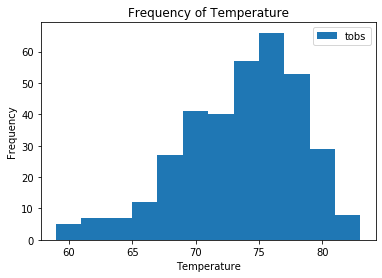

In [52]:
tobs_df.plot.hist(by='tobs', bins=12)
plt.title("Frequency of Temperature")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()